In [20]:
LOG_PATH = "log/example.log"

log = open(LOG_PATH, 'r')

window_sizes = []
progresses = {}

line = log.readline().strip()
while line:
    splits = line.split('|')
    if splits[0] == "window_size":
        window_sizes.append(int(splits[1]))
    elif splits[0] == "progress":
        if splits[1] in progresses:
            progresses[splits[1]].append(float(splits[2]))
        else:
            progresses[splits[1]] = [float(splits[2])]
    line = log.readline().strip()


print(window_sizes)
print(progresses)

[0, 1, 2, 5, 3, 9]
{'abc': [10.0, 30.0, 100.0], 'def': [14.0, 50.0, 150.0]}


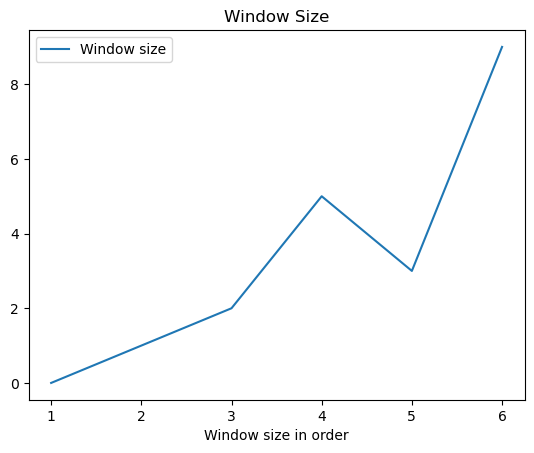

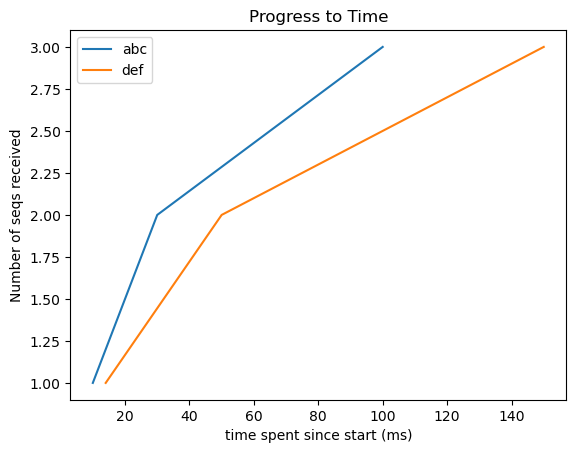

In [21]:
from matplotlib import pyplot as plt

plt.figure()
window_x = range(1, len(window_sizes) + 1)
plt.plot(window_x, window_sizes, label="Window size")
plt.xlabel("Window size in order")
plt.title("Window Size")
plt.legend()
plt.show()

plt.figure()
# max_time = 0
# for _, timestamps in progresses.items():
#     if max(timestamps) > max_time:
#         max_time = max(timestamps)
# plt.xlim(0, max_time)
for hash, timestamps in progresses.items():
    progress_y = range(1, len(timestamps) + 1)
    plt.plot(timestamps, progress_y, label=hash)
plt.xlabel("time spent since start (ms)")
plt.ylabel("Number of seqs received")
plt.title("Progress to Time")
plt.legend()
plt.show()